In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
decision_tree_db = pd.read_csv('df_with_transformed_time.csv', index_col=False)

In [3]:
decision_tree_db.head()

,landing_safety,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,durationInSeconds,LocationLat,LocationLng
0,green,2016,0.5,0.866025,0.937752,0.347305,-0.866025,-5.000000e-01,4800.0,38.0972,-106.1689
1,green,2016,0.5,0.866025,0.937752,0.347305,-0.707107,7.071068e-01,2400.0,38.0972,-106.1689
2,green,2016,0.5,0.866025,0.937752,0.347305,-0.500000,8.660254e-01,34800.0,38.0972,-106.1689
3,green,2016,0.5,0.866025,0.988468,0.151428,-0.500000,8.660254e-01,1200.0,38.0972,-106.1689
4,green,2016,0.5,0.866025,0.998717,-0.050649,1.000000,6.123234e-17,7200.0,38.0972,-106.1689


In [4]:
len(decision_tree_db[decision_tree_db.landing_safety == "red"])

1151819

In [5]:
len(decision_tree_db[decision_tree_db.landing_safety == "yellow"])

589361

In [6]:
len(decision_tree_db[decision_tree_db.landing_safety == "green"])

4385486

Vidimo da podaci nisu uravnotezeni i da imamo:
    zelenih ~ 4 miliona,
    crvenih ~ 1 milion,
    zutih ~ pola miliona
redova


Pravimo train i test skpove podataka i biramo samo numericke kolone.



In [7]:
X = decision_tree_db.values[:, [1,2,3,4,5,6,7,8,9,10]]
Y = decision_tree_db.values[:, 0]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=1)

In [9]:
print(X_train.shape)

(4288666, 10)


In [10]:
print(Y_train.shape)

(4288666,)


In [11]:
print(X_test.shape)

(1838000, 10)


In [12]:
print(Y_test.shape)

(1838000,)


Kreiramo pocetni model sa svim podacima i sa maksimalnom dubinom stabla odlucivanja.



In [13]:
model1 = tree.DecisionTreeClassifier()

In [14]:
model1 = model1.fit(X_train, Y_train)

In [15]:
Y_prediction = model1.predict(X_test)

In [16]:
from sklearn import metrics

In [17]:
print(metrics.classification_report(Y_test, Y_prediction ))

              precision    recall  f1-score   support

       green       0.83      0.82      0.83   1316493
         red       0.52      0.53      0.53    345387
      yellow       0.32      0.34      0.33    176120

    accuracy                           0.72   1838000
   macro avg       0.56      0.56      0.56   1838000
weighted avg       0.72      0.72      0.72   1838000



In [18]:
Y_prediction[500:520]

array(['red', 'green', 'yellow', 'green', 'red', 'green', 'green',
       'green', 'green', 'red', 'green', 'red', 'green', 'yellow',
       'green', 'green', 'yellow', 'green', 'green', 'green'],
      dtype=object)

In [19]:
decision_tree_db['landing_safety'][500:520]

500     green
501       red
502       red
503     green
504    yellow
505     green
506     green
507     green
508     green
509     green
510     green
511     green
512     green
513     green
514     green
515     green
516     green
517     green
518     green
519     green
Name: landing_safety, dtype: object

In [20]:
text_representation = tree.export_text(model1)

In [21]:
print(text_representation)

|--- feature_5 <= 0.38
|   |--- feature_6 <= 0.79
|   |   |--- feature_7 <= 1230.00
|   |   |   |--- feature_9 <= -95.00
|   |   |   |   |--- feature_2 <= 0.25
|   |   |   |   |   |--- feature_9 <= -112.53
|   |   |   |   |   |   |--- feature_8 <= 38.26
|   |   |   |   |   |   |   |--- feature_9 <= -122.43
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.68
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 2019.50
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= -122.58
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  -122.58
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |--- feature_0 >  2019.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= -0.53
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  -0.53
|   |   |   |   |  

Kreiramo drugi model bez kolone koja sadrzi vreme trajanja nepogode i sa maksimalnom dubinom stabla odlucivanja.



In [22]:
X_1 = decision_tree_db.values[:, [1,2,3,4,5,6,7,9,10]]
Y_1 = decision_tree_db.values[:, 0]

In [23]:
X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1,Y_1, test_size = 0.3, random_state=1)

In [24]:
model2 = tree.DecisionTreeClassifier()

In [25]:
model2 = model2.fit(X_1_train, Y_1_train)

In [26]:
Y_1_prediction = model2.predict(X_1_test)

In [27]:
print(metrics.classification_report(Y_1_test, Y_1_prediction ))

              precision    recall  f1-score   support

       green       0.85      0.86      0.85   1316493
         red       0.59      0.59      0.59    345387
      yellow       0.33      0.31      0.32    176120

    accuracy                           0.75   1838000
   macro avg       0.59      0.59      0.59   1838000
weighted avg       0.75      0.75      0.75   1838000



Radimo kros validaciju za dubinu stabla odlucivanja (od 1 do 25).




In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = tree.DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [30]:
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(20,20))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [31]:
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_1_train, Y_1_train, sm_tree_depths)

In [32]:
sm_cv_scores_mean.max()

0.7785943225502698

In [33]:
sm_cv_scores_std.max()

0.0009901137516972816

In [34]:
sm_accuracy_scores.max()

0.901224996304212

In [35]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-21 tree achieves the best mean cross-validation accuracy 77.85943 +/- 0.08551% on training dataset


Vidimo da se najbolji rezultati dobijaju kada je dubina stabla 21, tako da racunamo rezultate za tu vrednost.



In [36]:
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = tree.DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test

In [37]:
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, Y_train, 
                                                                          X_test, Y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  21
Accuracy, Training Set:  84.06999 %
Accuracy, Test Set:  75.94597 %


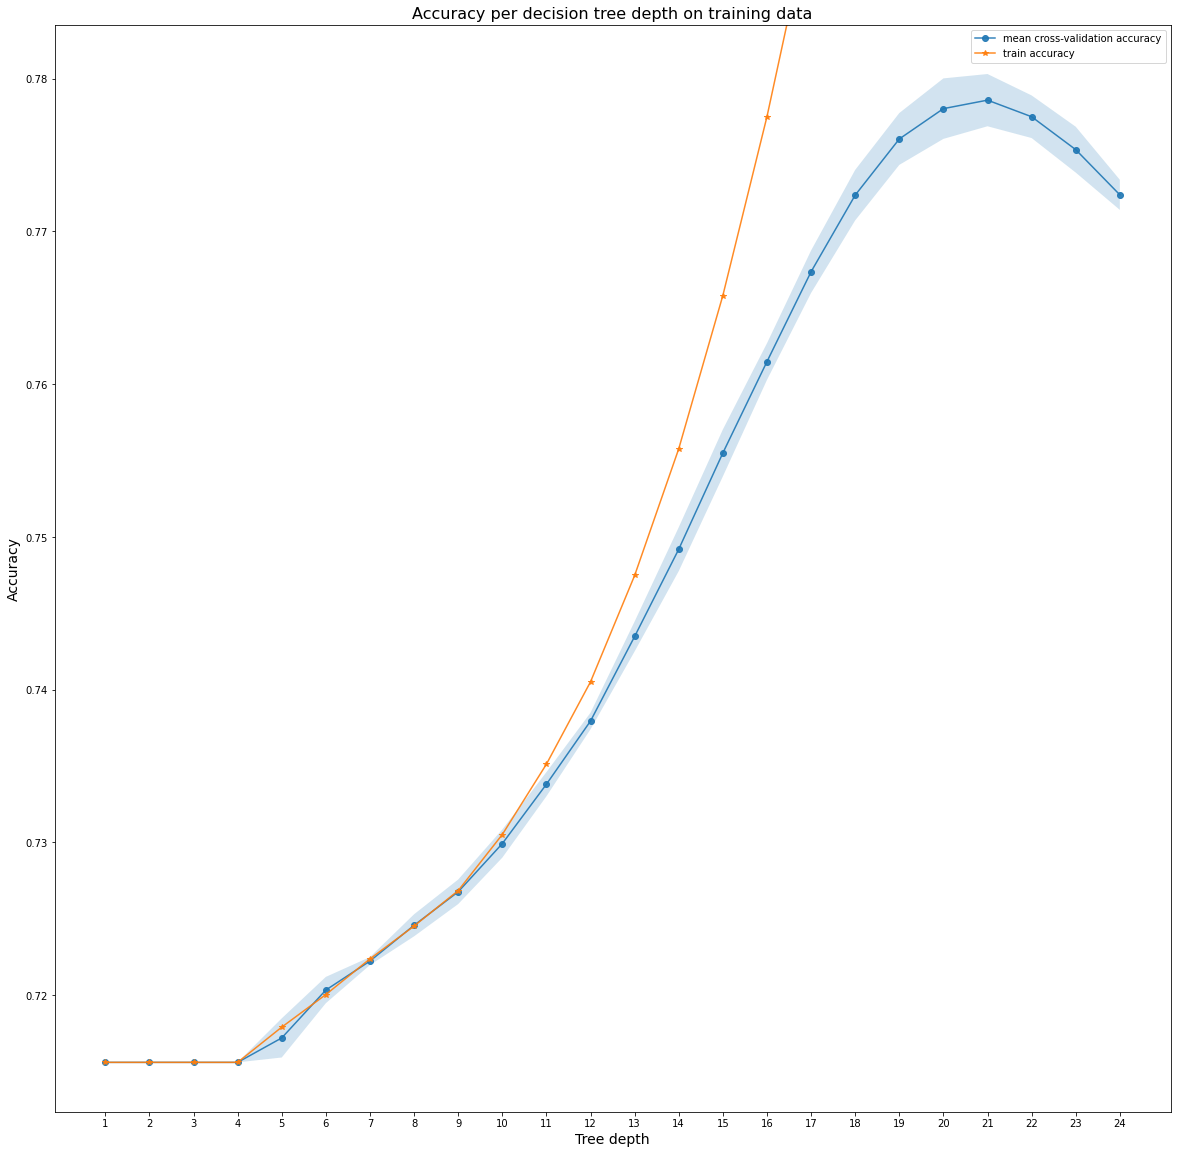

In [38]:
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [39]:
model_3 = tree.DecisionTreeClassifier(max_depth=sm_best_tree_depth).fit(X_1_train, Y_1_train)

In [40]:
text_representation = tree.export_text(model_3)

In [41]:
print(text_representation)

|--- feature_5 <= 0.38
|   |--- feature_6 <= 0.79
|   |   |--- feature_8 <= -95.00
|   |   |   |--- feature_2 <= 0.25
|   |   |   |   |--- feature_8 <= -116.12
|   |   |   |   |   |--- feature_1 <= -0.25
|   |   |   |   |   |   |--- feature_7 <= 44.05
|   |   |   |   |   |   |   |--- feature_0 <= 2019.50
|   |   |   |   |   |   |   |   |--- feature_8 <= -123.72
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 41.93
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= -0.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  -0.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- feature_7 >  41.93
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.05
|   |   |   |   |   |   |   

In [42]:
Y_2_prediction = model_3.predict(X_1_test)

In [43]:
print(metrics.classification_report(Y_1_test, Y_2_prediction ))

              precision    recall  f1-score   support

       green       0.82      0.93      0.87   1316493
         red       0.66      0.50      0.57    345387
      yellow       0.50      0.24      0.32    176120

    accuracy                           0.79   1838000
   macro avg       0.66      0.56      0.59   1838000
weighted avg       0.76      0.79      0.76   1838000



In [44]:
balanced_df = decision_tree_db.groupby('landing_safety')
balanced_df = decision_tree_db.apply(lambda x: x.sample(balanced_df.size().min()).reset_index(drop=True))

In [45]:
X_2 = balanced_df.values[:, [1,2,3,4,5,6,7,9,10]]
Y_2 = balanced_df.values[:, 0]

In [46]:
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2,Y_2, test_size = 0.3, random_state=1)

In [47]:
model_4 = tree.DecisionTreeClassifier(max_depth=sm_best_tree_depth).fit(X_2_train, Y_2_train)

In [48]:
Y_3_prediction = model_4.predict(X_2_test)

In [49]:
print(metrics.classification_report(Y_2_test, Y_3_prediction ))

              precision    recall  f1-score   support

       green       0.72      0.94      0.81    126598
         red       0.19      0.04      0.07     33272
      yellow       0.10      0.02      0.03     16939

    accuracy                           0.68    176809
   macro avg       0.34      0.33      0.30    176809
weighted avg       0.56      0.68      0.60    176809



In [50]:
importance1 = model1.feature_importances_

In [51]:
importance2 = model2.feature_importances_

In [52]:
importance3 = model_3.feature_importances_

In [53]:
importance4 = model_4.feature_importances_

In [54]:
for i,v in enumerate(importance1):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06765
Feature: 1, Score: 0.04816
Feature: 2, Score: 0.04472
Feature: 3, Score: 0.12169
Feature: 4, Score: 0.09841
Feature: 5, Score: 0.06221
Feature: 6, Score: 0.06367
Feature: 7, Score: 0.12757
Feature: 8, Score: 0.17613
Feature: 9, Score: 0.18980


In [57]:
for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07694
Feature: 1, Score: 0.05121
Feature: 2, Score: 0.04589
Feature: 3, Score: 0.13788
Feature: 4, Score: 0.11041
Feature: 5, Score: 0.08057
Feature: 6, Score: 0.08145
Feature: 7, Score: 0.20016
Feature: 8, Score: 0.21549


In [58]:
for i,v in enumerate(importance3):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08802
Feature: 1, Score: 0.06416
Feature: 2, Score: 0.05301
Feature: 3, Score: 0.14501
Feature: 4, Score: 0.11435
Feature: 5, Score: 0.06257
Feature: 6, Score: 0.05995
Feature: 7, Score: 0.19415
Feature: 8, Score: 0.21878


In [59]:
for i,v in enumerate(importance4):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05900
Feature: 1, Score: 0.06658
Feature: 2, Score: 0.07576
Feature: 3, Score: 0.08588
Feature: 4, Score: 0.10534
Feature: 5, Score: 0.08722
Feature: 6, Score: 0.09208
Feature: 7, Score: 0.21899
Feature: 8, Score: 0.20916


In [81]:
import matplotlib

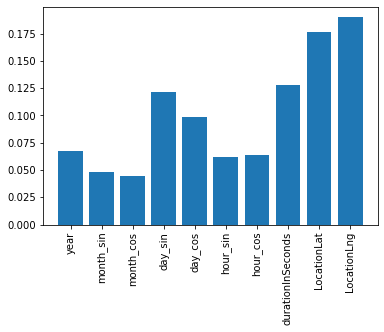

In [92]:
plt.bar([x for x in range(len(importance1))], importance1)
ax=plt.subplot()
ax.set_xticks(np.arange(0,10, 1))
ax.set_xticklabels(decision_tree_db.columns[1::], rotation = 90)
plt.show()

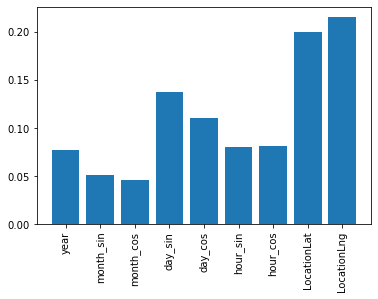

In [114]:
plt.bar([x for x in range(len(importance2))], importance2)
ax=plt.subplot()
ax.set_xticks(np.arange(0, 9, 1))
labels = decision_tree_db.columns[1::].values.tolist()
labels.remove('durationInSeconds')
ax.set_xticklabels(labels , rotation = 90)
plt.show()

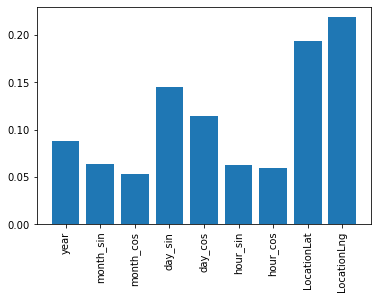

In [115]:
plt.bar([x for x in range(len(importance3))], importance3)
ax=plt.subplot()
ax.set_xticks(np.arange(0, 9, 1))
ax.set_xticklabels(labels, rotation = 90)
plt.show()

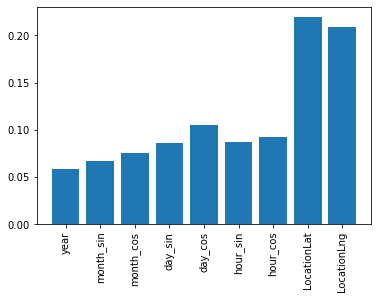

In [117]:
plt.bar([x for x in range(len(importance4))], importance4)
ax=plt.subplot()
ax.set_xticks(np.arange(0, 9, 1))
ax.set_xticklabels(labels, rotation = 90)
plt.show()